# Name: Marina Nasser Fayez
# Email: marinanasser8@gmail.com


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold


# 1. Data Preparation

## Loading Data


In [ ]:
# Correct the filename and use pd.read_excel to read Excel files
train_data = pd.read_excel('train.xlsx')  # Assuming the correct filename is 'train.xlsx'
test_data = pd.read_excel('test.xlsx')  # Assuming the correct filename is 'test.xlsx'

# Preview the data to confirm it's loaded correctly
print(train_data.head())
print(test_data.head())


   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0  

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Data Cleaning:
Handle missing values if any, and check for outliers that might affect model performance.


In [ ]:
# Check for missing values
print(train_data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
# Fill missing values with the median for each column
for column in ['fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']:
    train_data[column].fillna(train_data[column].median(), inplace=True)

# Verify that there are no more missing values
print(train_data.isnull().sum())


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# Data splitting

In [ ]:
# Separate features and target variable
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Normalization/Scaling:
Scale features like battery_power, ram, etc., as these could have different ranges.

In [ ]:

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 2. Exploratory Data Analysis (EDA)

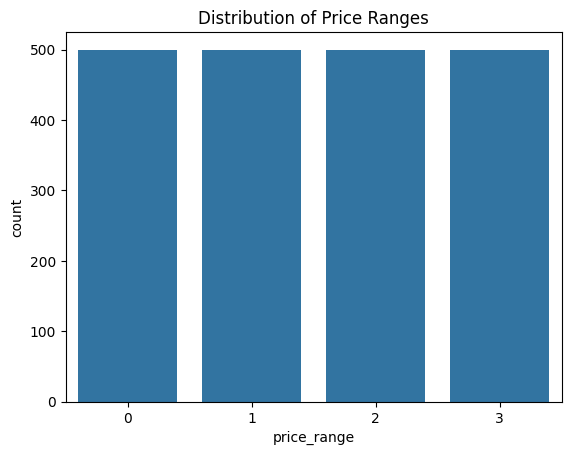

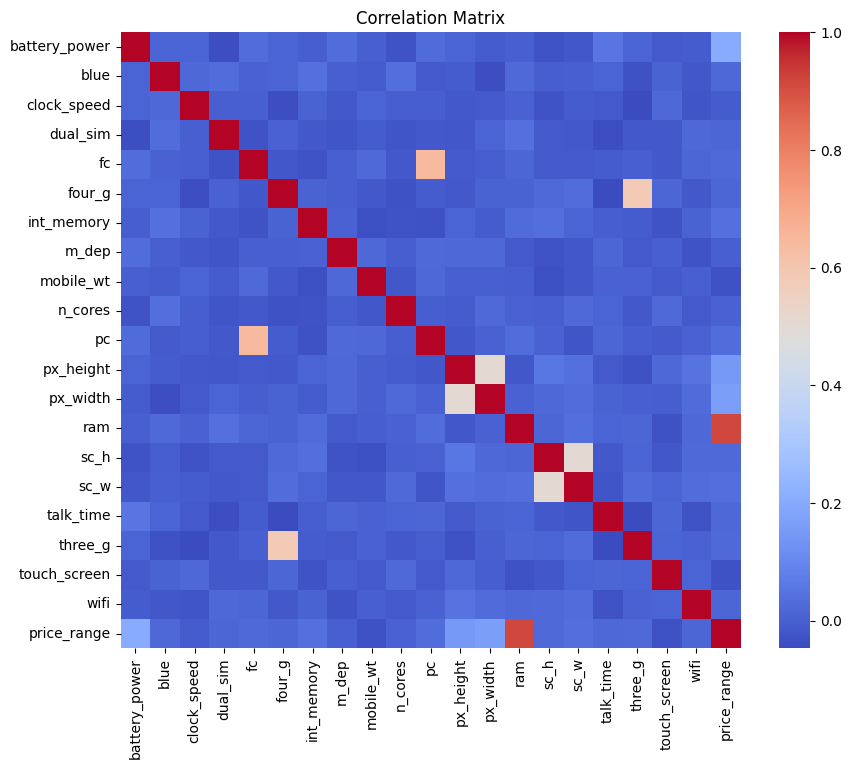

In [ ]:
# Distribution of target variable
sns.countplot(x='price_range', data=train_data)
plt.title('Distribution of Price Ranges')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 3. Model Training & evaluation
 Logistic Regression, Random Forest, Gradient Boosting Machines, and Support Vector Machines. Comment on why the selected algorithm fits the problem (e.g., Random Forest for handling non-linear data).


In [ ]:
# Initializing and training the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
logistic_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='rbf')
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Evaluating {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("\n")

# Train and evaluate each model
train_and_evaluate(random_forest, X_train, y_train, X_test, y_test)
train_and_evaluate(logistic_model, X_train, y_train, X_test, y_test)
train_and_evaluate(svm_model, X_train, y_train, X_test, y_test)
train_and_evaluate(gradient_boosting_model, X_train, y_train, X_test, y_test)
train_and_evaluate(knn_model, X_train, y_train, X_test, y_test)


Evaluating RandomForestClassifier
Confusion Matrix:
[[ 92   3   0   0]
 [  7  71  14   0]
 [  0  15  77   7]
 [  0   0   8 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        95
           1       0.80      0.77      0.78        92
           2       0.78      0.78      0.78        99
           3       0.94      0.93      0.93       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

Accuracy Score: 0.865


Evaluating LogisticRegression
Confusion Matrix:
[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   3  91   5]
 [  0   0   1 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.94      0.92      0.93        92
           2       0.94      0.92      0.93        99
           3       0.96 


Based on the evaluation metrics provided for the different classifiers, Logistic Regression stands out as the most effective model for this particular dataset, with an accuracy of 95.5%.
Not only did Logistic Regression achieve high accuracy, but it also scored high across other key metrics:

*   Precision: High precision indicates that the model has a low false positive rate. Logistic Regression achieved high precision across all categories, which means it was highly reliable in its positive predictions.
*   Recall: This model also showed high recall, particularly for the higher price ranges, indicating it successfully identified most of the true positives.
*   F1-Score: The F1-scores were high and balanced across all classes, suggesting a good balance between precision and recall.

# 5. Model Optimization


## Cross-validation

In [ ]:
# Define the k-fold cross-validation method
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform cross-validation
cv_results = cross_val_score(logistic_model, X_train, y_train, cv=kf, scoring='accuracy')

# Print the results for each fold
print("CV Results per fold: ", cv_results)
print("Average CV Accuracy: ", cv_results.mean())

CV Results per fold:  [0.95     0.975    0.94375  0.9375   0.959375]
Average CV Accuracy:  0.953125


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

# Create grid search object
clf = GridSearchCV(logistic_model, param_grid=param_grid, cv=kf, scoring='accuracy')

# Fit model
clf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", clf.best_params_)
print("Best Cross-validation Score:", clf.best_score_)


Best Parameters: {'C': 100, 'solver': 'newton-cg'}
Best Cross-validation Score: 0.9706250000000001


# Model Evaluation on Test Data

In [ ]:
best_model = clf.best_estimator_
test_predictions = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
print("Classification Report:\n", classification_report(y_test, test_predictions))

Test Accuracy: 0.97
Confusion Matrix:
 [[ 95   0   0   0]
 [  2  87   3   0]
 [  0   1  94   4]
 [  0   0   2 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       0.99      0.95      0.97        92
           2       0.95      0.95      0.95        99
           3       0.97      0.98      0.97       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

